## ROI kinematics

Cut the data around each ROI and get the times in which they start decelerating and turning. 
Visualize as heatmaps over the arena and the distributions of positions/time differences.

In [288]:
include("settings.jl")

  Activating project at `~/Documents/Github/LocomotionControl`


### Visualize ROIs
Plot XY tracking data for bouts trimmed to each ROI to visualize their location in the arena.

In [289]:
out_bouts = convert(DataFrame, py"get_bouts('outbound')")
sample_bouts = out_bouts[1:100, :];


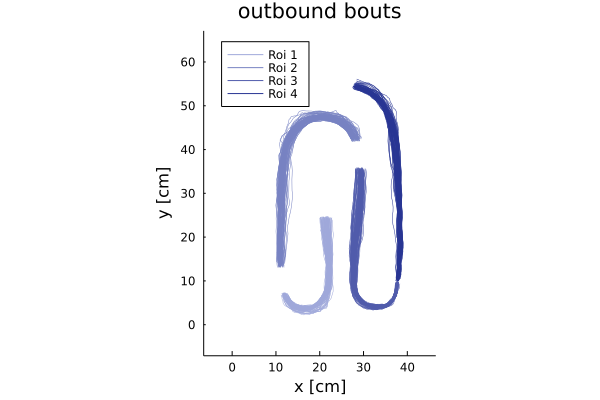

In [290]:
plt = plot(
    title="outbound bouts"; arena_ax_kwargs...
)

for roi in 1:4
    roi_bouts = get_roi_bouts(roi, sample_bouts)
    plot_bouts_trace!(plt, roi_bouts; color=roi_colors[roi], label="Roi $roi", legend=:topleft)
end

plt


### Heatmaps

Plot kinematics heatmaps for each ROI

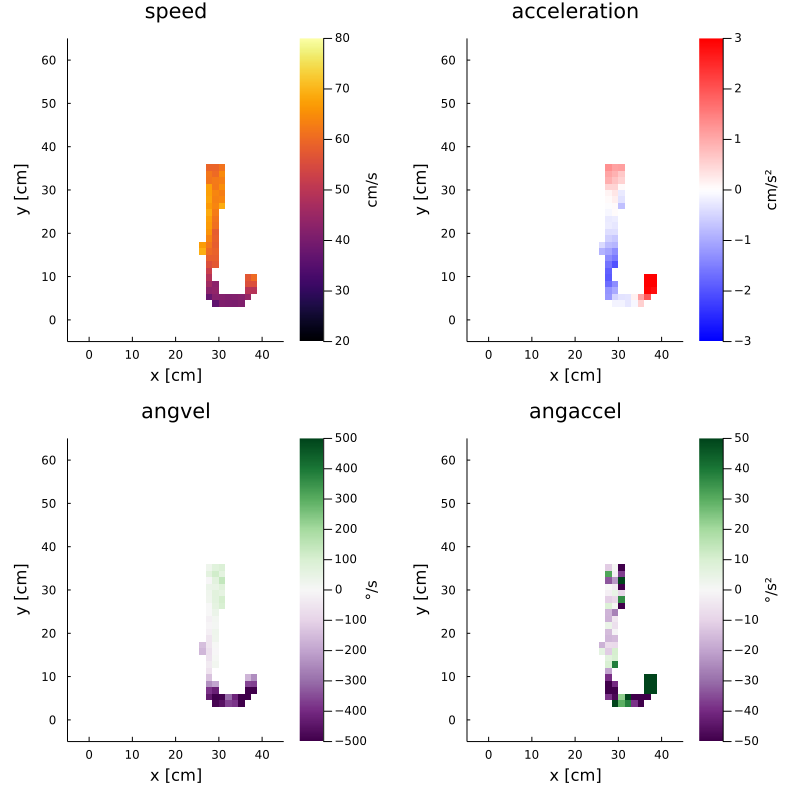

In [291]:
roi = 3
roi_bouts = get_roi_bouts(roi, sample_bouts)
s, X, Y, S, A, T, D = stack_kinematic_variables(roi_bouts)

plt = kinematics_heatmaps(X, Y, S, A, T, D;)
   

## Kinematics over s
Plot kinematics and mark ROIs over the s coordiante

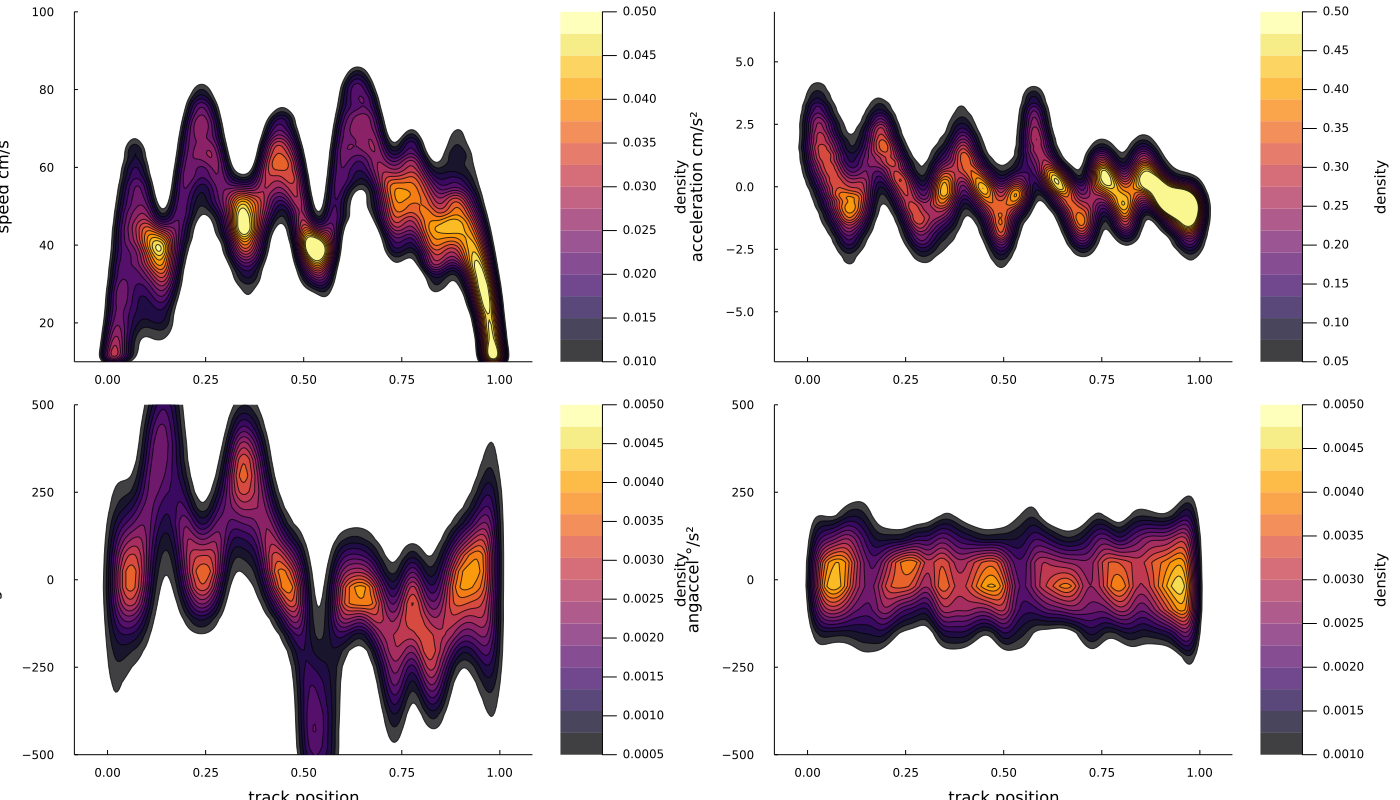

In [292]:
s, X, Y, S, A, T, D = stack_kinematic_variables(out_bouts)


p1 = plot(kde((s, S)), fill=(0, 0.75), clims=(0.01, 0.05), grid=false, colorbar_title="density", ylabel="speed cm/s", ylim=[10, 100])
p2 = plot(kde((s, A)), fill=(0, 0.75), clims=(0.05, 0.5), grid=false, colorbar_title="density", ylabel="acceleration cm/s²", ylim=[-7, 7])
p3 = plot(kde((s, T)), fill=(0, 0.75), clims=(0.0005, 0.005), grid=false, colorbar_title="density", ylabel="angvel °/s", ylim=[-500, 500], xlabel="track position")
p4 = plot(kde((s, D)), fill=(0, 0.75), clims=(0.001, 0.005), grid=false, colorbar_title="density", ylabel="angaccel °/s²", ylim=[-500, 500], xlabel="track position")

plot(
    p1, p2, p3, p4, layout=(2, 2), size=(1400, 800), legend=false
) |> display

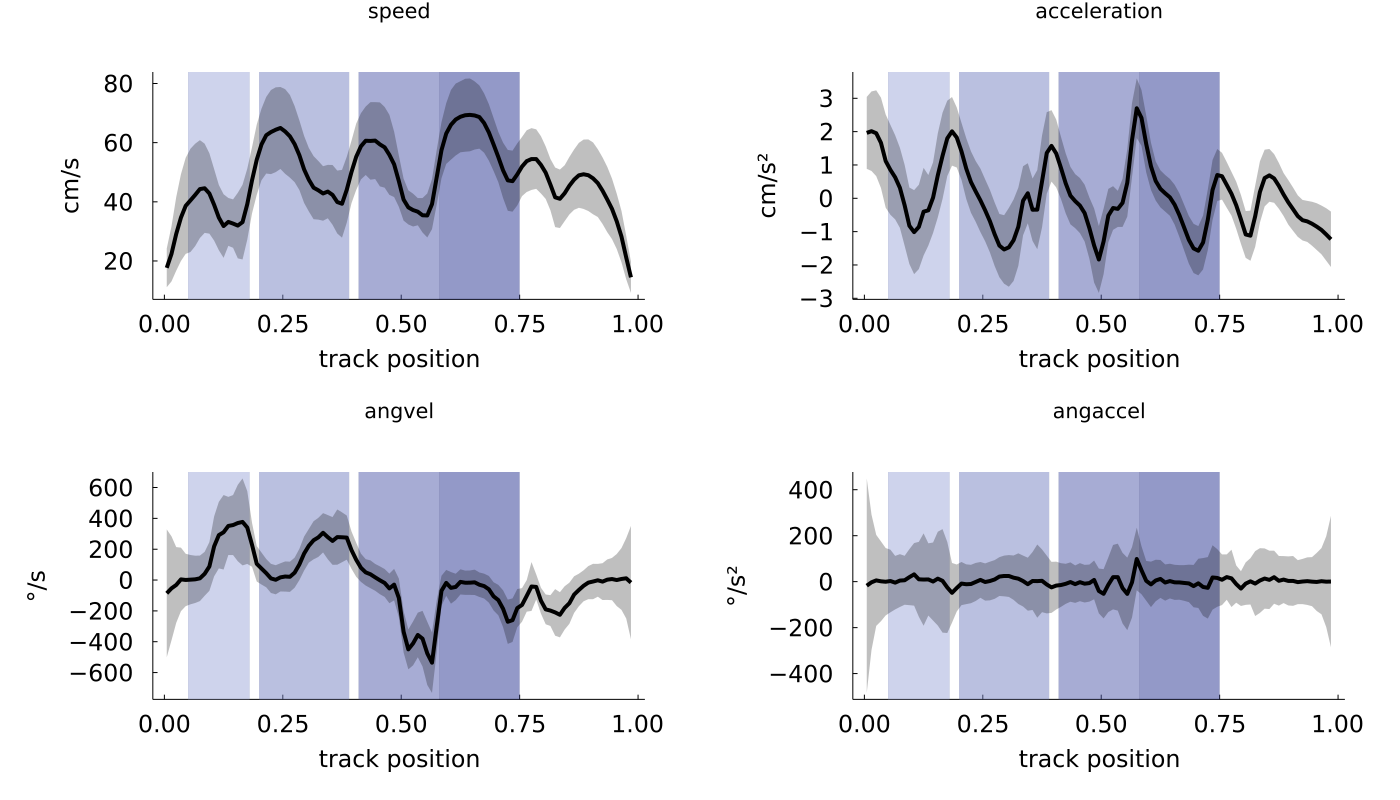

In [293]:
plots = []
for (name, var) in zip((:speed, :acceleration, :angvel, :angaccel), (S, A, T, D))
    x, μ, σ = bin_x_by_y(s, var, stepsize=0.01)
    c, l = variables_colors[name], variables_legends[name]

    plt = plot(xlabel="track position", ylabel=l, title=name)

    # mark ROIs locations
    for roi in 1:4
        vspan!(
            plt, [roi_limits[roi][1], roi_limits[roi][2]], 
            color=roi_colors[roi], alpha=0.5, label=nothing
        )
    end

    plot!(x, μ, ribbon=σ, color=:black,  label=nothing, lw=4, fill=(0, 0.25, :black))


    push!(plots, plt)
end

plot(plots..., layout=(2, 2), size=(1400, 800), legend=false; axes_kwargs..., axes_fontsize...)


## Slowing and Turning
For each trial detect when the mouse starts slowing down and when it starts turning at each ROIs. 

Make scatter plots of these positions over the arena. 
Make histograms of differences in kinematic variables at the two timepoints. 



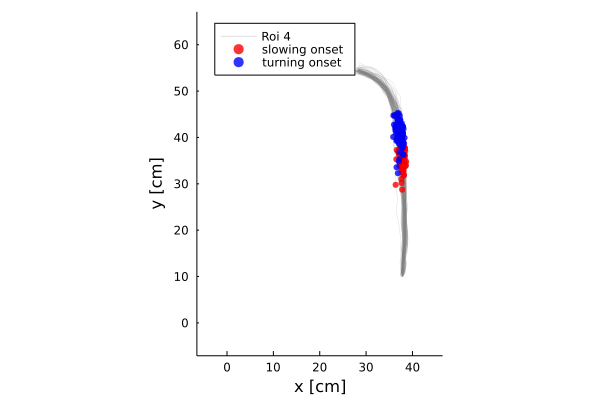

In [299]:
roi = 4
roi_bouts = get_roi_bouts(roi, sample_bouts)


ntrials = size(roi_bouts,1 )

timepoints = map(get_bout_slow_turn_onsets, eachrow(roi_bouts))
slowing_onsets, turning_onsets = first.(timepoints), last.(timepoints)

slowing_x = map(i -> roi_bouts[i, :x][slowing_onsets[1]], 1:ntrials)
slowing_y = map(i -> roi_bouts[i, :y][slowing_onsets[1]], 1:ntrials)
turning_x = map(i -> roi_bouts[i, :x][turning_onsets[1]], 1:ntrials)
turning_y = map(i -> roi_bouts[i, :y][turning_onsets[1]], 1:ntrials)

plt = plot_bouts_trace(roi_bouts; color=:grey, label="Roi $roi", legend=:topleft, alpha=.25)
scatter!(slowing_x, slowing_y, color=:red, label="slowing onset", legend=:topleft, ms=4, msa=0, msw=0, alpha=.8)
scatter!(turning_x, turning_y, color=:blue, label="turning onset", legend=:topleft, ms=4, msa=0, msw=0, alpha=.8)


In [295]:
ntrials

100